In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (
    dim_x=2, # analizujemy predkosc i polozenie wiec 2 wymiary 
             # (jezeli predkosc i polozenie w w wymiarach to 4)
    
    dim_z=1 # liczba mierzonych wymiarow
) 

In [4]:
f.x = np.array([[2.],    # initial position
                [0.]])   # initial velocity

In [5]:
f.F = np.array([[1.,1.],
                [0.,1.]])

In [6]:
f.H = np.array([[1.,0.]]) # ktory wymiar jest mierzony?

In [7]:
f.R = 7 # szum podczas mierzenia wartosci

In [8]:
# Covariance matrix - (How do the two dimentions relate?)

# I think this is saying ze sa niezalezne
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

In [9]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [10]:
sim_len = 75

results = []
likelihood = []
deltas = []
s = 0
v = 10
a = 10
for t in range(sim_len):
    s += v
#     s = (a*t**2) / 2
    likelihood.append(f.log_likelihood_of(s)) 
    f.predict()
    deltas.append(f.x[0] - s)
    f.update(s)
    results.append(f.x)
len(results[:][0])

2

In [11]:
len([i for i in range(sim_len)])

75

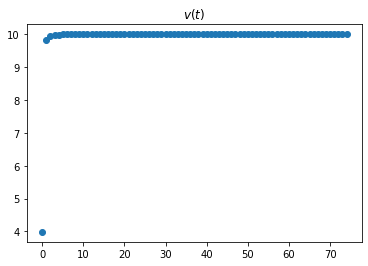

In [12]:
plt.title("$v(t)$")
plt.scatter([i for i in range(sim_len)],[speed[1] for speed in results])

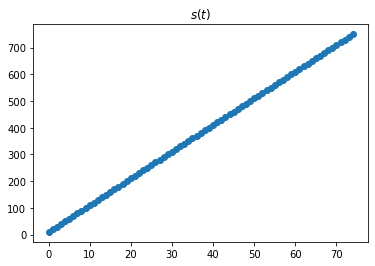

In [13]:
plt.title("$s(t)$")
plt.scatter([i for i in range(sim_len)],[speed[0] for speed in results])

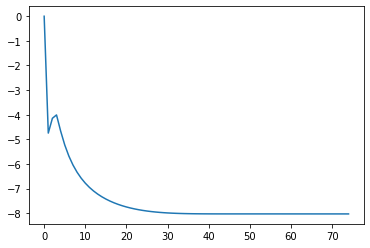

In [14]:
from math import exp

plt.plot(likelihood)

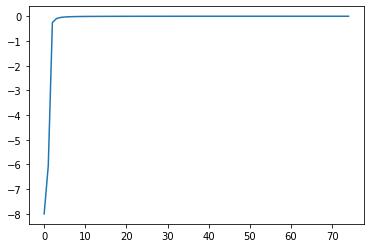

In [15]:
# plt.yscale('log')
plt.plot(deltas)

In [152]:
kf = KalmanFilter(dim_x=4, dim_z=2)
kf.x = np.array([1.0, 2.0, 1.0, 2.0])  # initial x and initial y

dt = 0.1
kf.F = np.array([[1., dt, 0., 0.], 
                 [0., 1., 0., 0.], 
                 [0., 0., 1., dt],
                 [0., 0., 0., 1]])
                 
# kf.H = np.array([[1., 1.]])  # ktory wymiar jest mierzony?
# kf.R = np.array([[10],[10]])

kf.P = np.diag([100., 100., 100., 100.])

from filterpy.common import Q_discrete_white_noise

# kf.Q = Q_discrete_white_noise(dim=4, dt=1, var=0.13)


In [153]:
def f(t):
    return np.array([3*t,2*t])

In [154]:
sim_len = 200

inputs = []
predicted = []
likelihood = []
deltas = []
for t in range(sim_len):
    new_position = f(t)
    inputs.append(new_position)
    likelihood.append(kf.log_likelihood_of(new_position))
    kf.predict()
    kf.update(new_position)
    predicted.append(kf.x)
len(predicted[:][0])


4

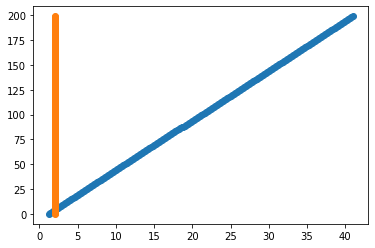

In [155]:
xs=[]
ys=[]
for r in results:
    xs.append(r[0])
    ys.append(r[1])

# plt.legend(True)
plt.scatter(xs, [t for t in range(sim_len)])
plt.scatter(ys, [t for t in range(sim_len)])
# plt.scatter(xs,ys)

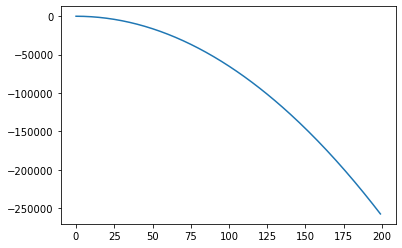

In [156]:
plt.plot(likelihood)

ValueError: too many values to unpack (expected 2)

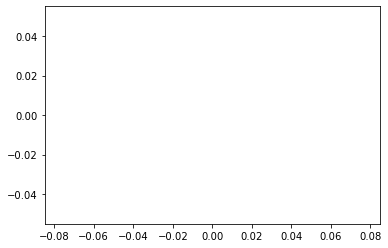

In [138]:
from filterpy.stats import plot_covariance_ellipse

plot_covariance_ellipse(kf.x, kf.P, edgecolor='k', ls='dashed')